This section contains the code used to generate figures in a Jupyter notebook.
All analyses were performed using MicrobiomeAnalyst, and the results were compiled into the `diversity_summary_250602.xlsx` file, organized by sheet.

To conduct the analysis in MicrobiomeAnalyst, the following four input files were used:
- `asv.csv`  
- `meta.csv`  
  *(both generated in Step 5)*  

- `taxa_silva_rev.csv`  
- `tree.nwk`  
  *(both derived from QIIME2 outputs)*

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

plt.rcParams['font.family'] = 'Arial'

import warnings
warnings.filterwarnings("ignore")

In [3]:
# "Beta diversity analysis was performed using MicrobiomeAnalyst."
# https://www.microbiomeanalyst.ca/

file_path = './Data/diversity_summary_250602.xlsx'

df_weight = pd.read_excel(file_path, sheet_name='f_weight').set_index('sampleid')
df_unweight = pd.read_excel(file_path, sheet_name='f_unweight').set_index('sampleid')

orders = ['B-type_Control', 'B_type_Artichoke', 'P-type_Control', 'P_type_Artichoke']


In [ ]:
# b-diveristy

def plot_confidence_ellipse(data, confidence_level=0.90):
    mean_x, mean_y = np.mean(data, axis=0)
    cov_matrix = np.cov(data, rowvar=False)
    eigvals, eigvecs = np.linalg.eigh(cov_matrix)

    if confidence_level == 0.95 :
        chi_square_val = 5.991
    elif confidence_level == 0.90 :
        chi_square_val = 4.605
    elif confidence_level == 0.8 :
        chi_square_val = 3.219
    else:
        raise ValueError('CI')

    scale = np.sqrt(chi_square_val)
    
    width, height = 2 * scale * np.sqrt(eigvals)    
    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))

    return (mean_x, mean_y), width, height, angle

def cal_ellipse(data, group_name, component1='Component1', componet2='Component2', cl=0.9):
    data = data[data.group == group_name]
    data = data[[component1, componet2]].values

    (mean_x, mean_y), width, height, angle = plot_confidence_ellipse(data, confidence_level=cl)

    return (mean_x, mean_y), width, height, angle


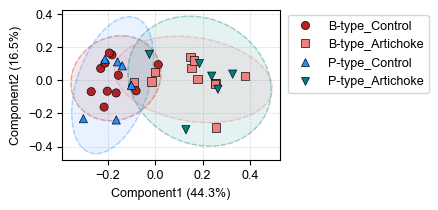

In [ ]:
# Figure 2D

palette = ['firebrick', 'lightcoral', 'dodgerblue','teal', ]
orders = ['B-type_Control', 'B-type_Artichoke', 'P-type_Control', 'P-type_Artichoke']


marker_size = 35
alpha = 0.8
is_ellipse = True

fig, ax = plt.subplots(figsize=(4.5, 2.2))
data = df_weight

if is_ellipse:
    alpha=0.1
    (mean_x, mean_y), width, height, angle = cal_ellipse(data, group_name=orders[0], cl=0.95, component1='PC1', componet2='PC2')
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, edgecolor='firebrick', facecolor='firebrick', alpha=alpha)
    ax.add_patch(ellipse)


    (mean_x, mean_y), width, height, angle = cal_ellipse(data, group_name=orders[1], cl=0.95, component1='PC1', componet2='PC2')
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, edgecolor='lightcoral', facecolor='lightcoral', alpha=alpha)
    ax.add_patch(ellipse)


    (mean_x, mean_y), width, height, angle = cal_ellipse(data, group_name=orders[2], cl=0.95, component1='PC1', componet2='PC2')
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, edgecolor='dodgerblue', facecolor='dodgerblue', alpha=alpha)
    ax.add_patch(ellipse)


    (mean_x, mean_y), width, height, angle = cal_ellipse(data, group_name=orders[3], cl=0.95, component1='PC1', componet2='PC2')
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, edgecolor='teal', facecolor='teal', alpha=alpha)
    ax.add_patch(ellipse)


    alpha=0.3

    (mean_x, mean_y), width, height, angle = cal_ellipse(data, group_name=orders[0], cl=0.95, component1='PC1', componet2='PC2')
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, edgecolor='firebrick', facecolor='none', alpha=alpha, linestyle='--')
    ax.add_patch(ellipse)
    

    (mean_x, mean_y), width, height, angle = cal_ellipse(data, group_name=orders[2], cl=0.95, component1='PC1', componet2='PC2')
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, edgecolor='dodgerblue', facecolor='none', alpha=alpha, linestyle='--')
    ax.add_patch(ellipse)
    
    (mean_x, mean_y), width, height, angle = cal_ellipse(data, group_name=orders[3], cl=0.95, component1='PC1', componet2='PC2')
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, edgecolor='teal', facecolor='none', alpha=alpha, linestyle='--')
    ax.add_patch(ellipse)

    (mean_x, mean_y), width, height, angle = cal_ellipse(data, group_name=orders[1], cl=0.95, component1='PC1', componet2='PC2')
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, edgecolor='lightcoral', facecolor='none', alpha=alpha, linestyle='--')
    ax.add_patch(ellipse)



unique_groups = data['group'].unique()
markers = ['o', 's', '^', 'v']


marker_dict = {group: marker for group, marker in zip(unique_groups, markers)}

sns.scatterplot(
    data=data,
    x='PC1',
    y='PC2',
    hue='group',
    style='group',
    markers=marker_dict,
    s=marker_size,
    edgecolor='k',
    palette=palette
)

if True:
    plt.xlabel(f'Component1 (44.3%)', fontsize=9)
    plt.ylabel(f'Component2 (16.5%)', fontsize=9)
    plt.xticks(fontsize=9,)
    plt.yticks(fontsize=9)
    plt.legend( bbox_to_anchor=(1.01, 1.01), fontsize=9)

    plt.tight_layout()
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
    plt.savefig('./Figures/weighted.png', dpi=500)

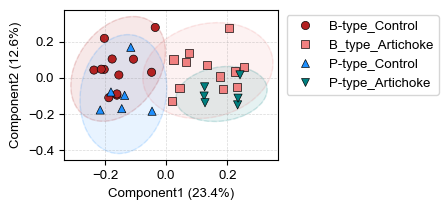

In [ ]:
# Figure 2E

palette = ['firebrick', 'lightcoral', 'dodgerblue','teal', ]
orders = ['B-type_Control', 'B_type_Artichoke', 'P-type_Control', 'P-type_Artichoke']


marker_size = 35
alpha = 0.8
is_ellipse = True

fig, ax = plt.subplots(figsize=(4.6, 2.2))
data = df_unweight


if is_ellipse:
    alpha=0.1
    (mean_x, mean_y), width, height, angle = cal_ellipse(data, group_name=orders[0], cl=0.95, component1='PC1', componet2='PC2')
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, edgecolor='firebrick', facecolor='firebrick', alpha=alpha)
    ax.add_patch(ellipse)


    (mean_x, mean_y), width, height, angle = cal_ellipse(data, group_name=orders[1], cl=0.95, component1='PC1', componet2='PC2')
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, edgecolor='lightcoral', facecolor='lightcoral', alpha=alpha)
    ax.add_patch(ellipse)


    (mean_x, mean_y), width, height, angle = cal_ellipse(data, group_name=orders[2], cl=0.95, component1='PC1', componet2='PC2')
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, edgecolor='dodgerblue', facecolor='dodgerblue', alpha=alpha)
    ax.add_patch(ellipse)


    (mean_x, mean_y), width, height, angle = cal_ellipse(data, group_name=orders[3], cl=0.95, component1='PC1', componet2='PC2')
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, edgecolor='teal', facecolor='teal', alpha=alpha)
    ax.add_patch(ellipse)


    (mean_x, mean_y), width, height, angle = cal_ellipse(data, group_name=orders[0], cl=0.95, component1='PC1', componet2='PC2')
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, edgecolor='firebrick', facecolor='none', alpha=alpha, linestyle='--')
    ax.add_patch(ellipse)
    
    (mean_x, mean_y), width, height, angle = cal_ellipse(data, group_name=orders[1], cl=0.95, component1='PC1', componet2='PC2')
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, edgecolor='lightcoral', facecolor='none', alpha=alpha, linestyle='--')
    ax.add_patch(ellipse)

    (mean_x, mean_y), width, height, angle = cal_ellipse(data, group_name=orders[2], cl=0.95, component1='PC1', componet2='PC2')
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, edgecolor='dodgerblue', facecolor='none', alpha=alpha, linestyle='--')
    ax.add_patch(ellipse)
    
    (mean_x, mean_y), width, height, angle = cal_ellipse(data, group_name=orders[3], cl=0.95, component1='PC1', componet2='PC2')
    ellipse = Ellipse((mean_x, mean_y), width, height, angle=angle, edgecolor='teal', facecolor='none', alpha=alpha, linestyle='--')
    ax.add_patch(ellipse)




unique_groups = data['group'].unique()
markers = ['o', 's', '^', 'v'] 

marker_dict = {group: marker for group, marker in zip(unique_groups, markers)}

sns.scatterplot(
    data=data,
    x='PC1',
    y='PC2',
    hue='group',
    style='group',
    markers=marker_dict,
    s=marker_size,
    edgecolor='k',
    palette=palette
)

if True:
    plt.xlabel(f'Component1 (23.4%)', fontsize=9.5)
    plt.ylabel(f'Component2 (12.6%)', fontsize=9.5)
    plt.xticks(fontsize=9.5,)
    plt.yticks(fontsize=9.5)
    plt.legend( bbox_to_anchor=(1.01, 1.01), fontsize=9.5)


    plt.tight_layout()
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
    plt.savefig('./Figures/unweighted.png', dpi=500)